In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from srim import TRIM, SR, Ion, Layer, Target
from srim.output import Results, Collision
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

In [37]:
output_directory = 'C://Users/hep/Desktop/Srim_data_(nathan)/40 keV_500 simulations_(exyz)'

In [38]:
results=Results(output_directory)

In [2]:
widths= [6,10,11,11,11,8,5,11,7,7,7,7]
df = pd.read_fwf('C://Users/hep/Desktop/Srim_data_(nathan)/10 keV_500 simulations_(exyz)/COLLISON.txt', skiprows=25, skipfooter=1, widths=widths, delimiter='³', header=None, engine='python',encoding='latin-1')

In [24]:
widths2= [7,12,12,12,12,12,12]
df2 = pd.read_fwf('C://Users/hep/Desktop/additional srim outputs/50 keV_1 simulation_(exyz)/EXYZ.txt', skiprows=15, skipfooter=1, delimeter=' ', widths= widths2, header=None, engine='python',encoding='latin-1')

In [25]:
print(df2.info)

<bound method DataFrame.info of     0          1         2         3          4         5            6
0   1  50.000000       0.0       0.0       0.00  0.008189      0.00000
1   1  45.325000   14243.0       0.0       0.00  0.007797   4674.70000
2   1  45.211000   20966.0   -1933.3     961.23  0.007787      3.54850
3   1  44.847000   36041.0   -6396.7    3049.00  0.007755    364.46000
4   1  44.558000   52550.0  -12931.0    5731.70  0.007730     10.30800
5   1  44.319000   66423.0  -18231.0    8122.20  0.007710      6.74990
6   1  44.140000   78645.0  -22730.0   10209.00  0.007694     11.96100
7   1  44.098000   88517.0  -26549.0   11935.00  0.007690     42.05000
8   1  43.974000   95903.0  -29148.0   13258.00  0.007680      1.82360
9   1  42.243000  108700.0  -33653.0   15640.00  0.007527   1731.30000
10  1  42.167000  113320.0  -34663.0   17283.00  0.007520      0.77735
11  1  41.875000  130810.0  -38332.0   23623.00  0.007494      5.22310
12  1  41.615000  146350.0  -41392.0   29294.

In [26]:
ion_numbers = df2[0].astype(int) 
ion_energy = df2[1].astype(float)
x_positions = df2[2].astype(float)    
y_positions = df2[3].astype(float)   
z_positions = df2[4].astype(float)    
elec_stopp_pwr= df2[5].astype(float)*10000

In [27]:
micro_x_positions=x_positions/10000
micro_y_positions=y_positions/10000
micro_z_positions=z_positions/10000

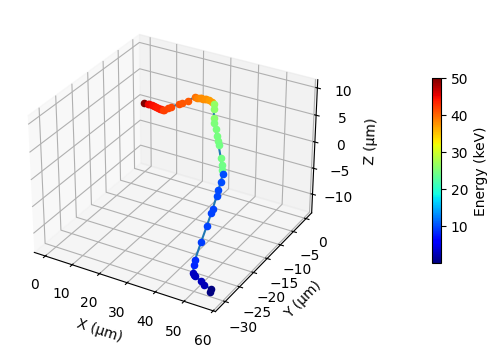

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(micro_x_positions,micro_y_positions,micro_z_positions)
norm = plt.Normalize(min(ion_energy), max(ion_energy))
cmap = plt.cm.jet
for i in range(len(x_positions)):
    color = cmap(norm(ion_energy[i]))
    ax.scatter(micro_x_positions[i], micro_y_positions[i], micro_z_positions[i], color=color)
sm = plt.cm.ScalarMappable(cmap=cmap,norm=norm)
sm.set_array([])
fig.colorbar(sm, label='Energy (keV)', ax=ax, shrink=0.5,pad=.2) 
ax.set_xlabel('X (μm)')
ax.set_ylabel('Y (μm)')
ax.set_zlabel('Z (μm)')
plt.show()

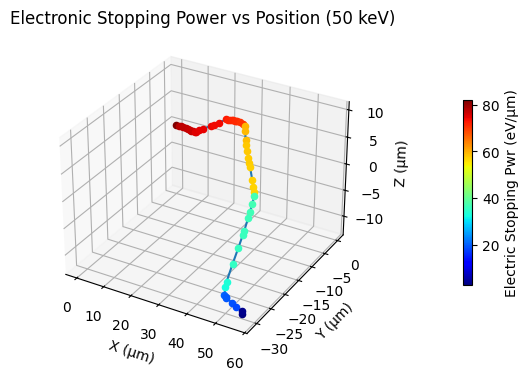

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(micro_x_positions,micro_y_positions,micro_z_positions)
norm = plt.Normalize(min(elec_stopp_pwr), max(elec_stopp_pwr))
cmap = plt.cm.jet
for i in range(len(x_positions)):
    color = cmap(norm(elec_stopp_pwr[i]))
    ax.scatter(micro_x_positions[i], micro_y_positions[i], micro_z_positions[i], color=color)
sm = plt.cm.ScalarMappable(cmap=cmap,norm=norm)
sm.set_array([])
fig.colorbar(sm, label='Electric Stopping Pwr (eV/μm)', ax=ax, shrink=0.5,pad=.2) 
ax.set_xlabel('X (μm)')
ax.set_ylabel('Y (μm)')
ax.set_zlabel('Z (μm)')
ax.set_title('Electronic Stopping Power vs Position (50 keV)')
plt.show()

In [14]:
distances_intervals = []
for i in range(len(x_positions)-1):
    disp_vec= np.array([x_positions[i+1]-x_positions[i],y_positions[i+1]-y_positions[i],z_positions[i+1]-z_positions[i]])
    distances_intervals.append(np.linalg.norm(disp_vec))

In [10]:
avg_stopp_pwr=[]
for i in range(len(x_positions)-1):
    avg_stopp_pwr.append((elec_stopp_pwr[i]+elec_stopp_pwr[i+1])/2)

In [15]:
elec_energy_losses= np.array(distances_intervals)*np.array(avg_stopp_pwr)

In [16]:
elec_energy_losses= np.insert(elec_energy_losses,0,0)

In [ ]:
distances= [0]
for j in range(x_positions):
    disp_vec= np.array([x_positions[i+1]-x_positions[i],y_positions[i+1]-y_positions[i],z_positions[i+1]-z_positions[i]])


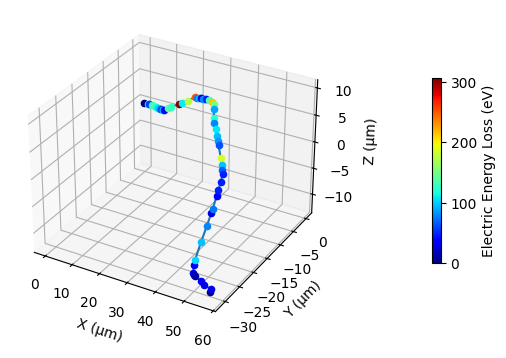

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(micro_x_positions,micro_y_positions,micro_z_positions)
norm = plt.Normalize(min(elec_energy_losses), max(elec_energy_losses))
cmap = plt.cm.jet
for i in range(len(x_positions)):
    color = cmap(norm(elec_energy_losses[i]))
    ax.scatter(micro_x_positions[i], micro_y_positions[i], micro_z_positions[i], color=color)
sm = plt.cm.ScalarMappable(cmap=cmap,norm=norm)
sm.set_array([])
fig.colorbar(sm, label='Electric Energy Loss (eV)', ax=ax, shrink=0.5,pad=.2) 
ax.set_xlabel('X (μm)')
ax.set_ylabel('Y (μm)')
ax.set_zlabel('Z (μm)')
plt.show()

In [4]:
initial_ion_data= []
with open('C://Users/hep/Desktop/Srim_data_(nathan)/50 keV_1 simulation4_(exyz)/COLLISON.txt', 'r') as file:
    for line in file:
          if line.strip().endswith('<== Start of New Cascade  ³'):
               data_points = line.strip().split('³')
               numpy_array = np.array(data_points)
               initial_ion_data.append(numpy_array)

In [20]:
remove_quotes = np.vectorize(lambda x: x.replace("'", ""))
cleaned_ion_array = remove_quotes(initial_ion_data)

In [2]:
widths= [6,10,11,11,11,8,5,11,7,7,7,7]
df = pd.read_fwf('C://Users/hep/Desktop/additional srim outputs/10 keV 100 simulations/COLLISON.txt', skiprows=25, skipfooter=1, widths=widths, delimiter='³', header=None, engine='python',encoding='latin-1')

In [3]:
df_filtered = df[df[0].str.match(r'^\d{5}$')]
df_filtered[[0,2,3,4]]

,0,2,3,4
0,00001,20606.E+00,2082.E-01,-8834.E-03
1,00001,36707.E+00,2577.E-01,-5458.E-01
2,00001,67193.E+00,-1002.E+00,-1594.E+00
3,00001,79829.E+00,-2396.E+00,-2829.E+00
4,00001,99646.E+00,-2137.E+00,-7359.E+00
...,...,...,...,...
4788,00100,23164.E+01,-5543.E+01,4644.E+01
4789,00100,23472.E+01,-6133.E+01,4749.E+01
4790,00100,23865.E+01,-6612.E+01,5151.E+01
4791,00100,24725.E+01,-6658.E+01,5776.E+01


In [4]:
particle_numbers = df_filtered[0].astype(int)  # Convert to integer if necessary
x_positions = df_filtered[2].astype(float)    # Convert to float
y_positions = df_filtered[3].astype(float)    # Convert to float
z_positions = df_filtered[4].astype(float)    # Convert to float

#convert to micrometers
x_positions= x_positions/10000
y_positions= y_positions/10000
z_positions= z_positions/10000

Text(0.5, 0.92, 'Distribution of Initial Ion Trajectories (10 keV)')

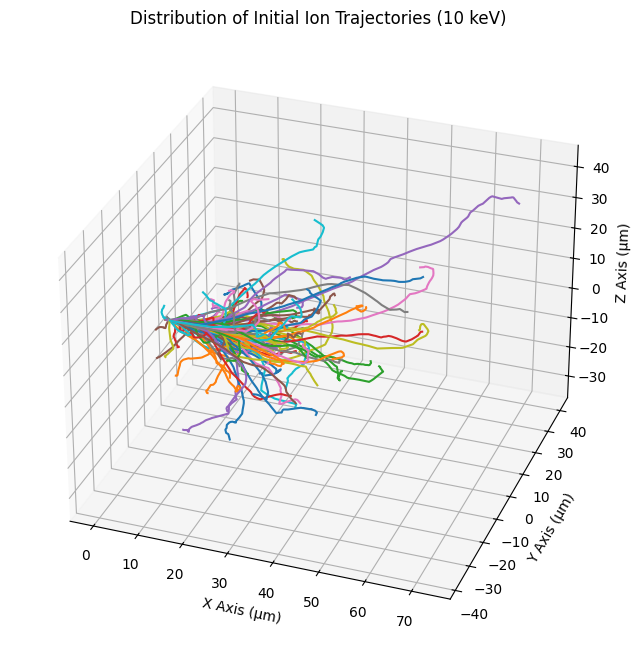

In [16]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for particle_num in particle_numbers.unique():
    mask = (particle_numbers == particle_num)
    ax.plot(x_positions[mask], y_positions[mask], z_positions[mask], label=f'Particle {particle_num}')
ax.set_xlabel('X Axis (μm)')
ax.set_ylabel('Y Axis (μm)')
ax.set_zlabel('Z Axis (μm)')
ax.view_init( azim=290)
ax.set_title('Distribution of Initial Ion Trajectories (10 keV)')

Text(0.5, 1.0, 'XY Projection of Distribution of Initial Ion Trajectories (10 keV)')

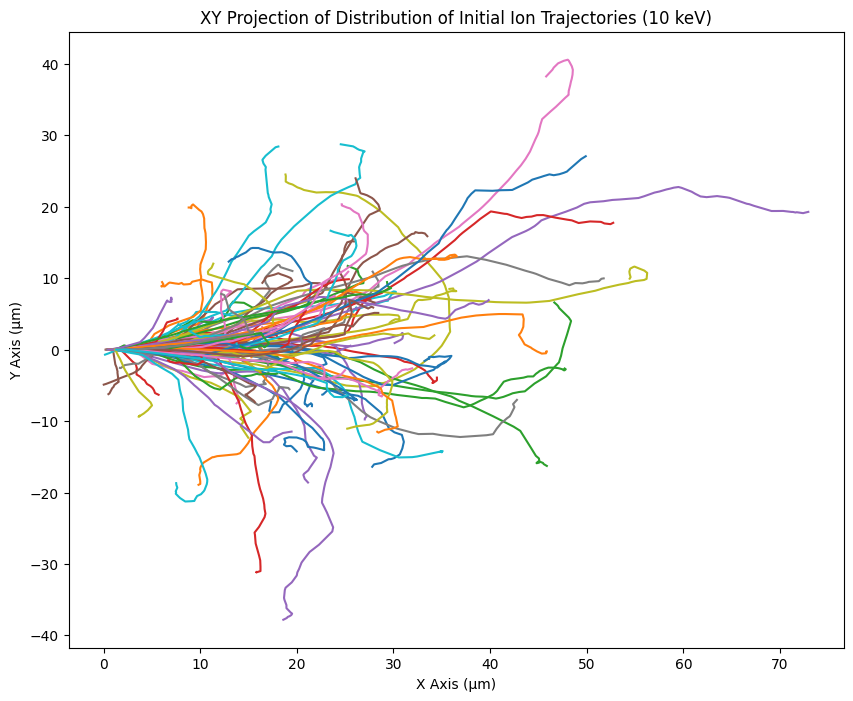

In [22]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
for particle_num in particle_numbers.unique():
    mask = (particle_numbers == particle_num)
    ax.plot(x_positions[mask], y_positions[mask], label=f'Particle {particle_num}')
ax.set_xlabel('X Axis (μm)')
ax.set_ylabel('Y Axis (μm)')
ax.set_title('XY Projection of Distribution of Initial Ion Trajectories (10 keV)')

In [6]:
widths2= [7,12,12,12,12,12,12]
df = pd.read_fwf('C://Users/hep/Desktop/Srim_data_(nathan)/100 keV_500 simulations_(exyz)/EXYZ.txt', skiprows=15, skipfooter=1, delimeter=' ', widths= widths2, header=None, engine='python',encoding='latin-1')
ion_groups=df.groupby(df[0])

Text(0.5, 0.92, 'Distribution of Initial Ion Trajectories (100 keV)')

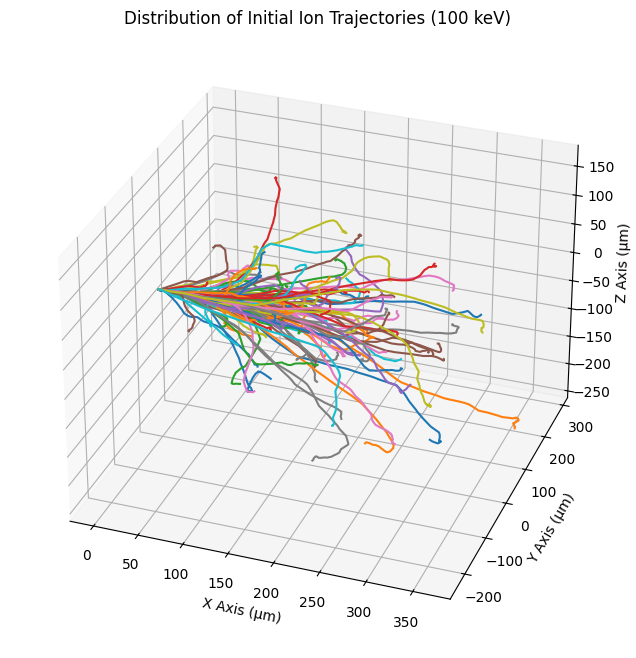

In [15]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for i in range(1,101):
    ion_num = ion_groups.get_group(i)
    x_pos= np.array(ion_num[2].astype(float))/10000
    y_pos= np.array(ion_num[3].astype(float))/10000
    z_pos= np.array(ion_num[4].astype(float))/10000
    ax.plot(x_pos,y_pos,z_pos)
ax.set_xlabel('X Axis (μm)')
ax.set_ylabel('Y Axis (μm)')
ax.set_zlabel('Z Axis (μm)')
ax.view_init( azim=290)
ax.set_title('Distribution of Initial Ion Trajectories (100 keV)')
    

Text(0.5, 1.0, 'XY Projection of Distribution of Initial Ion Trajectories (100 keV)')

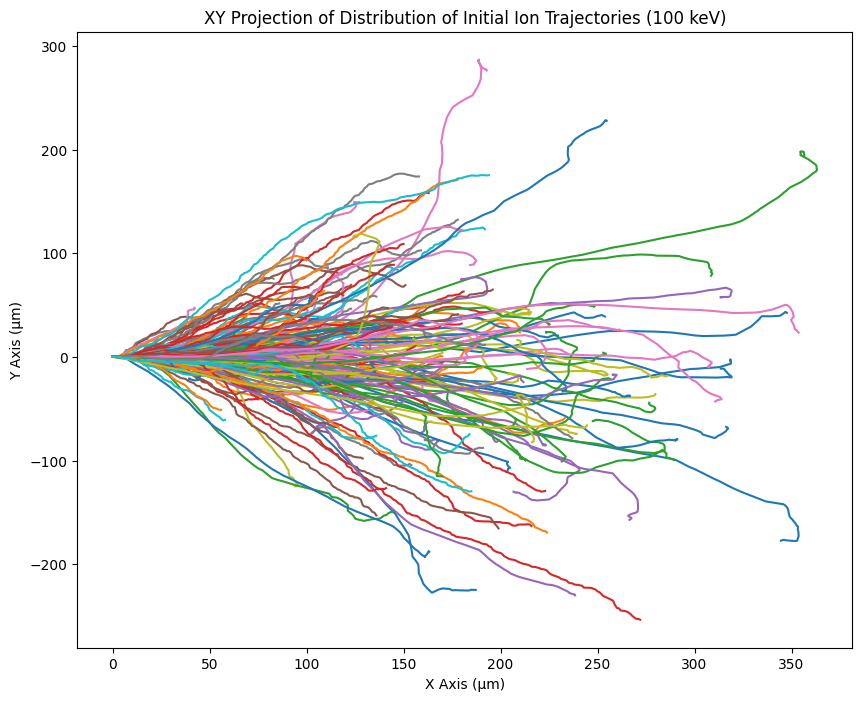

In [21]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
for i in range(1,101):
    ion_num = ion_groups.get_group(i)
    x_pos= np.array(ion_num[2].astype(float))/10000
    y_pos= np.array(ion_num[3].astype(float))/10000
    z_pos= np.array(ion_num[4].astype(float))/10000
    ax.plot(x_pos,y_pos,z_pos)
ax.set_xlabel('X Axis (μm)')
ax.set_ylabel('Y Axis (μm)')
ax.set_title('XY Projection of Distribution of Initial Ion Trajectories (100 keV)')